[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
[1 1 1 2 2 2]
[ 20.51828453  18.86796226  19.23538406 115.27792503 117.41379817
 118.92854998]
[1 2 0 3 4 5]
class:count {1: 3, 2: 1}
output: 1


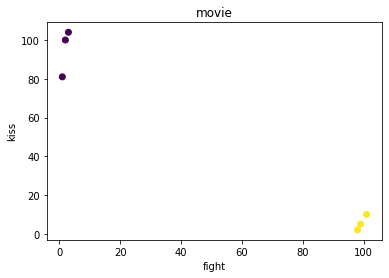

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#第一步，构建数据集
fight=(3,2,1,101,99,98)  #x轴为电影中出现打斗的次数
kiss=(104,100,81,10,5,2) #y轴为电影中出现接吻的次数
filmtype=(1,1,1,2,2,2)  #电影类型标签1为爱情片，2为动作片，3为未知
plt.scatter(fight,kiss,c=filmtype) #c是颜色
plt.xlabel('fight')
plt.ylabel('kiss')
plt.title('movie')

x=np.array([fight,kiss])
x=x.T #转置，保证每一行是一个样本
y=np.array(filmtype) #样本输出
print(x)
print(y)

#第二步 计算未知样本和每个训练集样本的举例
xx=np.array([18,90])
dist=(((x-xx)**2).sum(1))**0.5  #计算欧式距离
print(dist)

#第三步 将距离升序排序
sortedDist=np.argsort(dist)
print(sortedDist) #输出的是排序的索引

#第四步 选取距离最小的k个点，统计前k个点所在类别出现的次数
k=4
classCount={}#定义空的字典  他的key是电影类别的标签，值是出现的次数
for i in range(k): #循环k次
    voteLabel=y[sortedDist[i]] #看看是爱情片还是动作片
    classCount[voteLabel]=classCount.get(voteLabel,0)+1  #原值0 +1

print('class:count',classCount)

#第五步，多数表决，输出结果
maxType=0
maxCount=-1
for key,value in classCount.items(): #for 循环遍历字典
    if value>maxCount:
        maxType=key
        maxCount=value #出现类别最多的次数
print('output:',maxType)#输出出现次数最多的类别




plt.show()
plt.close()


In [9]:
 
import csv
import random
import math
import operator
 # 加载数据集
def loadDataset(filename, split, trainingSet = [], testSet = []):
     with open(filename, 'r') as csvfile:
         lines = csv.reader(csvfile)
         dataset = list(lines)
         for x in range(len(dataset)-1):
             for y in range(4):
                 dataset[x][y] = float(dataset[x][y])
             if random.random() < split:  #将数据集随机划分
                 trainingSet.append(dataset[x])
             else:
                 testSet.append(dataset[x])
 
 # 计算点之间的距离，多维度的
def euclideanDistance(instance1, instance2, length):
     distance = 0
     for x in range(length):
         distance += pow((instance1[x]-instance2[x]), 2)
     return math.sqrt(distance)
 
 # 获取k个邻居
def getNeighbors(trainingSet, testInstance, k):
     distances = []
     length = len(testInstance)-1
     for x in range(len(trainingSet)):
         dist = euclideanDistance(testInstance, trainingSet[x], length)
         distances.append((trainingSet[x], dist))   #获取到测试点到其他点的距离
     distances.sort(key=operator.itemgetter(1))    #对所有的距离进行排序
     neighbors = []
     for x in range(k):   #获取到距离最近的k个点
         neighbors.append(distances[x][0])
         return neighbors
 
 # 得到这k个邻居的分类中最多的那一类
def getResponse(neighbors):
     classVotes = {}
     for x in range(len(neighbors)):
         response = neighbors[x][-1]
         if response in classVotes:
             classVotes[response] += 1
         else:
             classVotes[response] = 1
     sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
     return sortedVotes[0][0]   #获取到票数最多的类别
 
 #计算预测的准确率
def getAccuracy(testSet, predictions):
     correct = 0
     for x in range(len(testSet)):
         if testSet[x][-1] == predictions[x]:
             correct += 1
     return (correct/float(len(testSet)))*100.0
 
 
def main():
     #prepare data
     trainingSet = []
     testSet = []
     split = 0.67
     loadDataset(r'irisdata.txt', split, trainingSet, testSet)
     print('Trainset: ' + repr(len(trainingSet)))
     print('Testset: ' + repr(len(testSet)))
     #generate predictions
     predictions = []
     k = 3
     for x in range(len(testSet)):
         # trainingsettrainingSet[x]
         neighbors = getNeighbors(trainingSet, testSet[x], k)
         result = getResponse(neighbors)
         predictions.append(result)
         print ('predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
     print('predictions: ' + repr(predictions))
     accuracy = getAccuracy(testSet, predictions)
     print('Accuracy: ' + repr(accuracy) + '%')
 
if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'irisdata.txt'